In [104]:
import pandas as pd

df = pd.read_csv('C:/Users/playdata2/Desktop/python_src/pandas-data-analysis/part7/data/San-Francisco-Crime.csv')
len(df.Category.value_counts())

39

In [105]:
df.describe(include='object')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
count,878049,878049,878049,878049,878049,878049,878049
unique,389257,39,879,7,10,17,23228
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST
freq,185,174900,60022,133734,157182,526790,26533


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [107]:
# 불필요한 컬럼제거
train = df.drop(columns=['Descript','Resolution','Address'])
train.head()

,Dates,Category,DayOfWeek,PdDistrict,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541


In [108]:
# 범주형 데이터 변환
# 종속변수 Category 인코딩
from sklearn.preprocessing import LabelEncoder
train.Category =  LabelEncoder().fit_transform(train.Category)
train.head()

,Dates,Category,DayOfWeek,PdDistrict,X,Y
0,2015-05-13 23:53:00,37,Wednesday,NORTHERN,-122.425892,37.774599
1,2015-05-13 23:53:00,21,Wednesday,NORTHERN,-122.425892,37.774599
2,2015-05-13 23:33:00,21,Wednesday,NORTHERN,-122.424363,37.800414
3,2015-05-13 23:30:00,16,Wednesday,NORTHERN,-122.426995,37.800873
4,2015-05-13 23:30:00,16,Wednesday,PARK,-122.438738,37.771541


In [109]:
# 경찰서 관할구역 PdDistrict - oneHot
district_dummies =  pd.get_dummies(train.PdDistrict,prefix='Distirict').astype(int)
# 합치기
train = pd.concat([train,district_dummies], axis=1)
train = train.drop(columns=['PdDistrict'])
train.head()

,Dates,Category,DayOfWeek,X,Y,Distirict_BAYVIEW,Distirict_CENTRAL,Distirict_INGLESIDE,Distirict_MISSION,Distirict_NORTHERN,Distirict_PARK,Distirict_RICHMOND,Distirict_SOUTHERN,Distirict_TARAVAL,Distirict_TENDERLOIN
0,2015-05-13 23:53:00,37,Wednesday,-122.425892,37.774599,0,0,0,0,1,0,0,0,0,0
1,2015-05-13 23:53:00,21,Wednesday,-122.425892,37.774599,0,0,0,0,1,0,0,0,0,0
2,2015-05-13 23:33:00,21,Wednesday,-122.424363,37.800414,0,0,0,0,1,0,0,0,0,0
3,2015-05-13 23:30:00,16,Wednesday,-122.426995,37.800873,0,0,0,0,1,0,0,0,0,0
4,2015-05-13 23:30:00,16,Wednesday,-122.438738,37.771541,0,0,0,0,0,1,0,0,0,0


In [110]:
train['Year'] =  pd.to_datetime(train.Dates).dt.year
train['Month'] =  pd.to_datetime(train.Dates).dt.month
train['Day'] =  pd.to_datetime(train.Dates).dt.day
train['Hour'] =  pd.to_datetime(train.Dates).dt.hour
train['Minute'] =  pd.to_datetime(train.Dates).dt.minute

train = train.drop(columns=['Dates'])

# one hot
dayofweek_onehot = pd.get_dummies(train.DayOfWeek, prefix='Day').astype(int)
train = pd.concat([ train, dayofweek_onehot], axis=1)
train = train.drop(columns=['DayOfWeek'])
train.head()

,Category,X,Y,Distirict_BAYVIEW,Distirict_CENTRAL,Distirict_INGLESIDE,Distirict_MISSION,Distirict_NORTHERN,Distirict_PARK,Distirict_RICHMOND,...,Day,Hour,Minute,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,37,-122.425892,37.774599,0,0,0,0,1,0,0,...,13,23,53,0,0,0,0,0,0,1
1,21,-122.425892,37.774599,0,0,0,0,1,0,0,...,13,23,53,0,0,0,0,0,0,1
2,21,-122.424363,37.800414,0,0,0,0,1,0,0,...,13,23,33,0,0,0,0,0,0,1
3,16,-122.426995,37.800873,0,0,0,0,1,0,0,...,13,23,30,0,0,0,0,0,0,1
4,16,-122.438738,37.771541,0,0,0,0,0,1,0,...,13,23,30,0,0,0,0,0,0,1


In [111]:
from sklearn.model_selection import train_test_split
# 훈련 데이터 분리
X = train.drop(columns=['Category']).to_numpy()
y = train.Category

x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=42)
x_train.shape ,  y_train.shape

((702439, 24), (702439,))

In [112]:
# 모델 생성 및 학습
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()  # 과적합 가능성이 크다
# 모델 학습
model.fit(x_train,y_train)
# 평가 정확도
model.score(x_train,y_train),  model.score(x_test,y_test)

(0.8778071832571939, 0.23969591708900403)

In [113]:
# 하이퍼 파라메터 튜닝
from sklearn.model_selection import GridSearchCV
param_grid = {
   'max_depth':[3,5,7,10,15],
   'min_samples_split' : [2,10,20],  # 노드를 분할하기위한 최소 샘플수(복잡도 제어)
   'min_samples_leaf' : [1,5,10], # 리프노드를 나누기 위한 최소 샘플수
   'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV( 
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=5,
    return_train_score=True,
    n_jobs=-1  # 모든 cpu코어 사용
 )
grid_search.fit(x_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 5, ...], 'min_samples_split': [2, 10, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'gini'


In [114]:
grid_search.best_params_, grid_search.best_score_

({'criterion': 'gini',
  'max_depth': 15,
  'min_samples_leaf': 1,
  'min_samples_split': 20},
 np.float64(0.27907476609365334))

In [115]:
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')
results = results[[
    'params',
    'mean_train_score',
    'mean_test_score',
    'rank_test_score'
]]
print('GridSearchCV 결과')
results.head()

GridSearchCV 결과


,params,mean_train_score,mean_test_score,rank_test_score
38,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.332745,0.279075,1
41,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.331617,0.279008,2
43,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.329466,0.278434,3
37,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.339192,0.278428,4
42,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.329468,0.278427,5


In [116]:
from sklearn.metrics import classification_report
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.11      0.00      0.01       303
           1       0.17      0.12      0.14     15375
           2       0.00      0.00      0.00        81
           3       0.00      0.00      0.00        58
           4       0.15      0.05      0.07      7351
           5       0.18      0.02      0.03       864
           6       0.00      0.00      0.00       454
           7       0.33      0.43      0.37     10794
           8       0.07      0.00      0.00       856
           9       0.08      0.00      0.01       233
          10       0.00      0.00      0.00        51
          11       0.00      0.00      0.00        98
          12       0.13      0.03      0.05      2122
          13       0.16      0.02      0.03      3336
          14       0.00      0.00      0.00        29
          15       0.00      0.00      0.00       468
          16       0.33      0.68      0.45     34980
          17       0.00    

c:\Users\playdata2\Desktop\python_src\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\playdata2\Desktop\python_src\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\playdata2\Desktop\python_src\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [117]:
# 가중치 조절
# 클래스 불균형이 심한경우, 소수의 클래스에 가중치를 더 부여
# 사이킷런 계열은 대부분 class_weight 존재
best_params = grid_search.best_params_
best_params['class_weight'] = 'balanced'
balanced_tree = DecisionTreeClassifier(**best_params)
balanced_tree.fit(x_train, y_train)
y_pred = balanced_tree.predict(x_test)
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.01      0.08      0.01       303
           1       0.13      0.00      0.00     15375
           2       0.00      0.19      0.00        81
           3       0.00      0.05      0.00        58
           4       0.10      0.03      0.05      7351
           5       0.02      0.05      0.03       864
           6       0.01      0.34      0.03       454
           7       0.26      0.42      0.32     10794
           8       0.02      0.16      0.04       856
           9       0.01      0.23      0.01       233
          10       0.00      0.00      0.00        51
          11       0.00      0.20      0.01        98
          12       0.06      0.08      0.07      2122
          13       0.06      0.06      0.06      3336
          14       0.00      0.21      0.00        29
          15       0.00      0.02      0.01       468
          16       0.43      0.09      0.15     34980
          17       0.01    

In [119]:
# 데이터 증강
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42, k_neighbors=4)
# 훈련데이터에 대해서만 적용
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)
y_train_over.value_counts()

Category
4     139920
16    139920
7     139920
21    139920
36    139920
27    139920
37    139920
19    139920
1     139920
25    139920
23    139920
20    139920
35    139920
28    139920
24    139920
5     139920
34    139920
13    139920
38    139920
32    139920
26    139920
30    139920
12    139920
17    139920
8     139920
18    139920
31    139920
3     139920
0     139920
6     139920
15    139920
14    139920
9     139920
11    139920
10    139920
29    139920
2     139920
33    139920
22    139920
Name: count, dtype: int64

In [ ]:
# best_params 재 사용
over_tree = DecisionTreeClassifier(**best_params)
over_tree.fit(x_train_over, y_train_over)
over_tree.score(x_test, y_test)

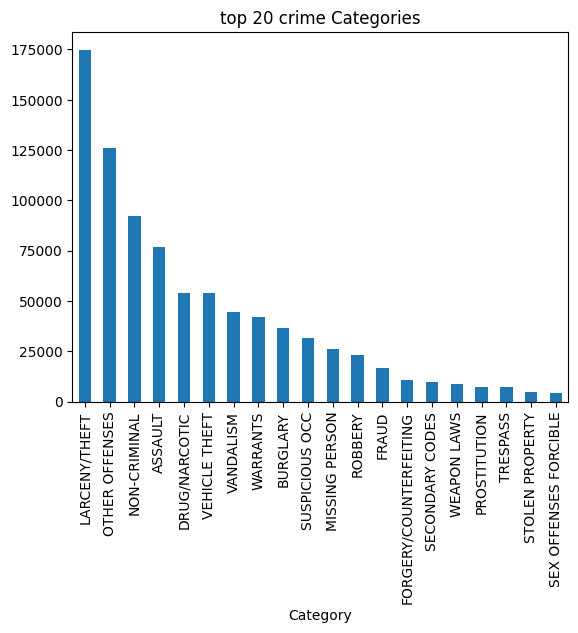

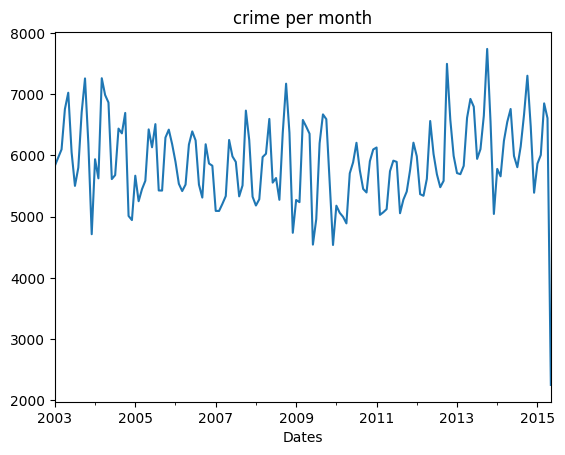

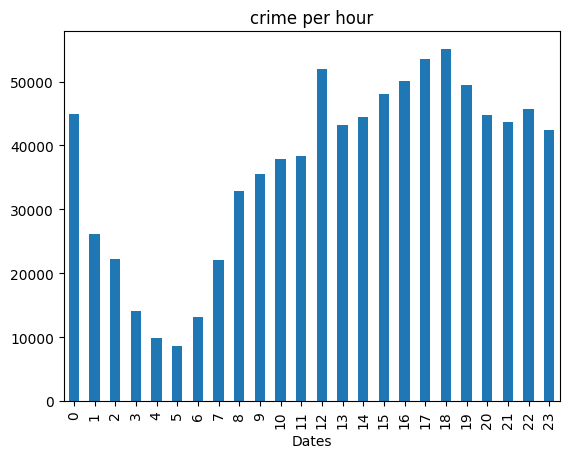

In [ ]:
# EDA
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('C:/Users/playdata2/Desktop/python_src/pandas-data-analysis/part7/data/San-Francisco-Crime.csv')
df.isna().mean().sort_values(ascending=False)

# top categories
df.Category.value_counts().head(20).plot(kind='bar')
plt.title('top 20 crime Categories')
plt.show()

# 월별 트렌드
dt = pd.to_datetime(df.Dates)
monthly = df.groupby([dt.dt.to_period('M')]).size().rename('count').to_timestamp()
monthly.plot()
plt.title('crime per month')
plt.show()

# 시간대
dt.dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title('crime per hour')
plt.show()

# District counts
df.PdDistrict.value_counts().plot(kind='bar')
plt.title('crime by District')
plt.show()

In [135]:
# Feature Engineering
import numpy as np
out = df.copy()
dt = pd.to_datetime(out.Dates)
out['Year'] = dt.dt.year.astype(np.int16)
out['Month'] = dt.dt.month.astype(np.int8)
out['Day'] = dt.dt.day.astype(np.int8)
out['Hour'] = dt.dt.hour.astype(np.int8)
out['Minute'] = dt.dt.minute.astype(np.int8)
out['isWeekend'] = (dt.dt.dayofweek >=5).astype(np.int8)
# 시간정보 시계처럼 2차원 원위에 표현 -->
# 1. 데이터를 각도로 변환 2*np.pi*시간 / 24.0  0~23시를 360도 원의 각도로 변환  6시 90도 12시 180도
# 2. 좌표계산 (x y)
# cosign  sigin 

out['sign_hour'] = np.sin(2*np.pi*out.Hour/24.0).astype(np.float32)
out['cos_hour'] = np.cos(2*np.pi*out.Hour/24.0).astype(np.float32)
mask = {
    'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6
}
out['dow_idx'] = out.DayOfWeek.map(mask).astype(np.int8)
out['sin_dow'] = np.sin(2*np.pi*out.dow_idx/7.0).astype(np.float32)
out['cos_dow'] = np.cos(2*np.pi*out.dow_idx/7.0).astype(np.float32)

# address
out['HasBlock'] = out.Address.str.contains('Block', case=False,regex=False).astype(np.int8)
new_center_x = -122.391846
new_center_y = 37.778125
# 지구둘레 40,000(지구둘레) / 360  111.1KM   1도당 111.0
dx = (out.X - new_center_x) * (111.0*np.cos(np.deg2rad(new_center_y)))
dy = (out.Y - new_center_y) * 111.0
# 거리
out['dist_km_new_center'] = np.sqrt(dx*dx +dy*dy).astype(np.float32)

out['X_round2'] = out.X.round(2).astype(np.float32)
out['y_round2'] = out.Y.round(2).astype(np.float32)

In [141]:
le = LabelEncoder()
y = le.fit_transform(out.Category)
class_names = le.classes_
len(class_names)
category_cols = ['PdDistrict','isWeekend','HasBlock' ] 
numeric_cols = [ 'Year', 'Month', 'Day', 'Hour','Minute','sign_hour', 'cos_hour', 'dow_idx', 'sin_dow', 'cos_dow',
'X', 'Y','dist_km_new_center','X_round2', 'y_round2']
X_df = out[category_cols + numeric_cols]
# 데이터 분류
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_df, y, test_size=0.2, stratify=y,random_state=42)

In [142]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
ohe.fit(x_train[category_cols])
xtr_cat = ohe.transform(x_train[category_cols])
xte_cat = ohe.transform(x_test[category_cols])
scaler = StandardScaler()
xtr_num = scaler.fit_transform(x_train[numeric_cols]).astype(np.float32)
xte_num = scaler.transform(x_test[numeric_cols]).astype(np.float32)

x_train_ = np.hstack([xtr_cat, xtr_num]).astype(np.float32)
x_test_ = np.hstack([xte_cat, xte_num]).astype(np.float32)

In [148]:
# 확률적 검사하강법 - 미분개념, 기울기, 학습, 오차
%pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 307.3 kB/s eta 0:00:04
   -------------- ------------------------- 0.5/1.5 MB 307.3 kB/s eta 0:00:04
   --------------------- ------------------ 0.8/1.5 MB 398.7 kB/s eta 0:00:02
   ---------------------------- ----------- 1.0/1.5 MB 507.1 kB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 507.1 kB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 563

In [149]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
lgbm.fit(x_train_, y_train)
lgbm.score(x_test_, y_test)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [ ]:
# 범죄유형별로 모델 만들기 one vs reset
# 하나의 모델을 정교화 - 모든 범죄유형을 한번에 분류.. 불균형 문제를 효과적
